In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# clone the tensorflow models on the colab cloud vm
!git clone --q https://github.com/tensorflow/models.git

# navigate to /models/research folder to compile protos
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python setup.py install 

/content/models/research
running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/export_tflite_graph_tf2.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/inputs_test.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2.py -> build/l

In [ ]:
cd ../..

/content


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xzvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-06-20 13:57:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.115.128, 2607:f8b0:4004:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.115.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   292MB/s    in 1.3s    

2022-06-20 13:57:08 (292 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
s

In [ ]:
cd drive/MyDrive/customTF2

/content/drive/MyDrive/customTF2


In [ ]:
#For train.record
!python generate_tfrecord.py data/train_labels.csv  data/label_map.pbtxt data/images/ data/train.record

#For test.record
!python generate_tfrecord.py data/test_labels.csv  data/label_map.pbtxt data/images/ data/test.record

groups: 100% 1223/1223 [05:59<00:00,  3.40it/s]
Successfully created the TFRecords: /content/drive/MyDrive/customTF2/data/train.record
groups: 100% 277/277 [01:16<00:00,  3.61it/s]
Successfully created the TFRecords: /content/drive/MyDrive/customTF2/data/test.record


In [ ]:
cd ../../..

/content


In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/customTF2/data/results/eval'

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/customTF2/training_3'

In [ ]:
cd models/research/object_detection

/content/models/research/object_detection


In [ ]:
!python model_main_tf2.py --pipeline_config_path=/content/drive/MyDrive/customTF2/data/pipeline.config --model_dir=/content/drive/MyDrive/customTF2/training --alsologtostderr

2022-06-17 17:02:01.936770: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0617 17:02:01.975316 139925489727360 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0617 17:02:02.379806 139925489727360 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0617 17:02:02.380007 139925489727360 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0617 17:02:02.529339 139925489727360 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib_v2.

In [ ]:
!python model_main_tf2.py --pipeline_config_path=/content/drive/MyDrive/customTF2/data/pipeline.config --model_dir=/content/drive/MyDrive/customTF2/training_1 --alsologtostderr

2022-06-18 14:54:35.554361: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0618 14:54:35.559292 140631804176256 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0618 14:54:35.889270 140631804176256 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0618 14:54:35.889472 140631804176256 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0618 14:54:36.027883 140631804176256 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib_v2.

In [ ]:
!python model_main_tf2.py --pipeline_config_path=/content/drive/MyDrive/customTF2/data/pipeline.config --model_dir=/content/drive/MyDrive/customTF2/training_2 --alsologtostderr

2022-06-18 17:12:45.710831: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0618 17:12:45.717700 140711433643904 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0618 17:12:46.073106 140711433643904 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0618 17:12:46.073302 140711433643904 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0618 17:12:46.217003 140711433643904 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib_v2.

In [ ]:
# testing installation
!python object_detection/builders/model_builder_tf2_test.py

In [ ]:
pwd

'/content/models/research/object_detection'

In [ ]:
# evaluation
!python model_main_tf2.py --pipeline_config_path=/content/drive/MyDrive/customTF2/data/pipeline.config --model_dir=/content/drive/MyDrive/customTF2/training_3/ --alsologtostderr

2022-06-20 15:04:30.906475: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0620 15:04:30.911752 140364680324992 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0620 15:04:31.153894 140364680324992 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0620 15:04:31.154093 140364680324992 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0620 15:04:31.295784 140364680324992 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib_v2.

In [ ]:
# exporting
!python exporter_main_v2.py --trained_checkpoint_dir=/content/drive/MyDrive/customTF2/training_2/ --pipeline_config_path=/content/drive/MyDrive/customTF2/data/pipeline.config --output_directory /content/drive/MyDrive/customTF2/data/inference_graph_1/

2022-06-18 18:56:54.112908: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0618 18:56:56.346729 140272280082304 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-06-18 18:57:34.352008: W tensorflow/python/util/util.cc:368] Sets are not currently 

In [ ]:
cd ..

/content/models/research


In [ ]:
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/content/drive/MyDrive/customTF2/data/inference_graph_1/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/drive/MyDrive/customTF2/data/label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

image_path = "/content/drive/MyDrive/customTF2/data/images/00041000_test.jpg"
#print('Running inference for {}... '.format(image_path), end='')


Loading model...Done!


In [ ]:
image_np = np.asarray(np.array(Image.open(image_path)))
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]
input_tensor = input_tensor[..., tf.newaxis]
input_tensor = tf.concat([input_tensor,input_tensor[:,:,:,:],
                          input_tensor[:,:,:,:]], 3)

print(input_tensor)

tf.Tensor(
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]], shape=(1, 640, 640, 3), dtype=uint8)


In [ ]:
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

In [ ]:
image_np = np.array(Image.open(image_path))
image_np = np.repeat(image_np[:, :, np.newaxis], 3, axis=2)
print(image_np.shape)

(640, 640, 3)


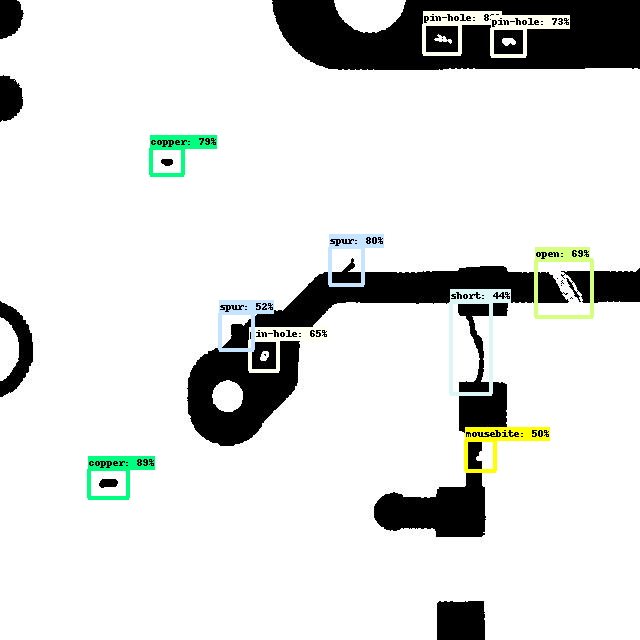

In [ ]:
image_np_with_detections = image_np

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)

cv2_imshow(image_np_with_detections)